In [4]:
import seaborn as sns
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import math
import nltk as nltk
import cv2
import imageio
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.draw.dispersion import dispersion_plot


pd.set_option('display.max_rows', None)
df = pd.read_json('./train.json')
df.head()

bathrooms  bedrooms                       building_id  \
10            1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
10000         1.0         2  c5c8a357cba207596b04d1afd1e4f130   
100004        1.0         1  c3ba40552e2120b0acfc3cb5730bb2aa   
100007        1.0         1  28d9ad350afeaab8027513a3e52ac8d5   
100013        1.0         4                                 0   

                    created  \
10      2016-06-24 07:54:24   
10000   2016-06-12 12:19:27   
100004  2016-04-17 03:26:41   
100007  2016-04-18 02:22:02   
100013  2016-04-28 01:32:41   

                                              description  \
10      A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
10000                                                       
100004  Top Top West Village location, beautiful Pre-w...   
100007  Building Amenities - Garage - Garden - fitness...   
100013  Beautifully renovated 3 bedroom flex 4 bedroom...   

            display_address  \
10      Metropolitan Avenue   
10000       Columbus Avenue   
100004          W 13 Street   
100007     East 49th Street   
100013    West 143rd Street   

                                                 features  latitude  \
10                                                     []   40.7145   
10000   [Doorman, Elevator, Fitness Center, Cats Allow...   40.7947   
100004  [Laundry In Building, Dishwasher, Hardwood Flo...   40.7388   
100007                          [Hardwood Floors, No Fee]   40.7539   
100013                                          [Pre-War]   40.8241   

        listing_id  longitude                        manager_id  \
10         7211212   -73.9425  5ba989232d0489da1b5f2c45f6688adc   
10000      7150865   -73.9667  7533621a882f71e25173b27e3139d83d   
100004     6887163   -74.0018  d9039c43983f6e564b1482b273bd7b01   
100007     6888711   -73.9677  1067e078446a7897d2da493d2f741316   
100013     6934781   -73.9493  98e13ad4b495b9613cef886d79a6291f   

                                                   photos  price  \
10      [https://photos.renthop.com/2/7211212_1ed4542e...   3000   
10000   [https://photos.renthop.com/2/7150865_be3306c5...   5465   
100004  [https://photos.renthop.com/2/6887163_de85c427...   2850   
100007  [https://photos.renthop.com/2/6888711_6e660cee...   3275   
100013  [https://photos.renthop.com/2/6934781_1fa4b41a...   3350   

                 street_address interest_level  
10      792 Metropolitan Avenue         medium  
10000       808 Columbus Avenue            low  
100004          241 W 13 Street           high  
100007     333 East 49th Street            low  
100013    500 West 143rd Street            low

# Histogram/Boxplot for Price

Outliers lie outside the upper and lower limits represented by the ends of the whiskers.
The upper and lower limits are:  6500.0  and  100.0 , respectively.
(Calculated using Interquantile Range Rule: 75% quantile + 1.5*IQR and 25% quantile - IQR*1.5)

The total number of records before removing the outliers is  49352 .

The total number of records after removing the outliers is  46389 .
2963 outliers have been removed.


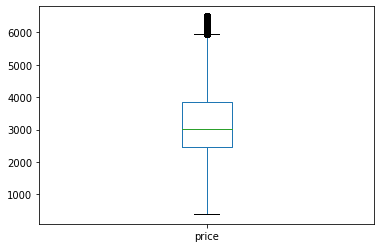

In [5]:
df_price = df['price']  
IQR = df_price.quantile(0.75)-df_price.quantile(0.25)
upper = df_price.quantile(0.75)+IQR*1.5
lower = df_price.quantile(0.25)-IQR*1.5

print ("Outliers lie outside the upper and lower limits represented by the ends of the whiskers.")
print("The upper and lower limits are: ", upper," and ", lower ,", respectively.")
print("(Calculated using Interquantile Range Rule: 75% quantile + 1.5*IQR and 25% quantile - IQR*1.5)")

before = df_price.count()
df_price = df_price[(df_price<6500) & (df_price>50)]
after = df_price.count()

print("\nThe total number of records before removing the outliers is ",before,".") 
df_price = df_price[(df_price<6500) & (df_price>50)]
print("\nThe total number of records after removing the outliers is ", after,".")
print(str(before-after)+ " outliers have been removed.")
  

_ = df_price.plot.box()

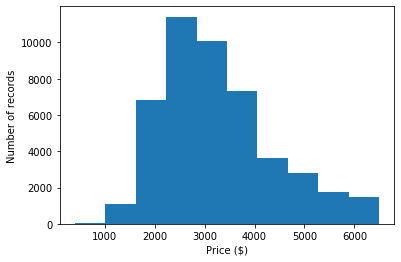

In [6]:
counts, bins = np.histogram(df_price)
_ = plt.hist(bins[:-1], bins, weights = counts)
_ = plt.xlabel('Price ($)')
_ = plt.ylabel('Number of records')

# Histogram/Boxplot for Latitude

The upper and lower limits are:  40.8433  and  40.6593 , respectively.
The total number of records before removing the outliers is 49352 .
The total number of records after removing the outliers is  47404 .
1948 outliers have been removed.


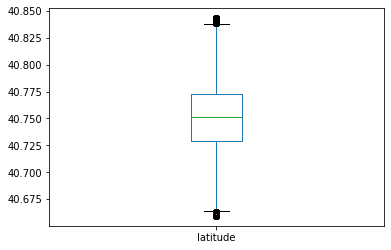

In [7]:
df_lat = df['latitude']

IQR = df_lat.quantile(0.75)-df_lat.quantile(0.25)
upper = df_lat.quantile(0.75)+IQR*1.5
lower = df_lat.quantile(0.25)-IQR*1.5


print("The upper and lower limits are: ", upper," and ", lower ,", respectively.") 

print("The total number of records before removing the outliers is", before,".")

before = df_lat.count()
df_lat = df_lat[(df_lat<40.8433) & (df_lat>40.6593)]
after = df_lat.count()

print("The total number of records after removing the outliers is ", after,".")

print(str(before-after) +" outliers have been removed.")


_ = df_lat.plot.box()

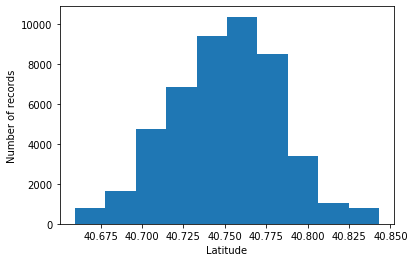

In [8]:
counts, bins = np.histogram(df_lat)
_ = plt.hist(bins[:-1], bins, weights = counts)
_ = plt.xlabel('Latitude')
_ = plt.ylabel('Number of records')


# Histogram/Boxplot for Longitude

The upper and lower limits are:  -73.89945000000003 and -74.04704999999998 , respectively.
The total number of records before removing the outliers is 49352 .
The total number of records after removing the outliers is  48250 .
1102 outliers have been removed.


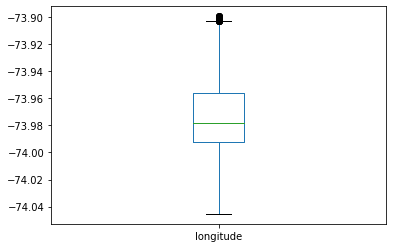

In [9]:
df_long = df['longitude']
 
IQR = df_long.quantile(0.75)-df_long.quantile(0.25)
upper = df_long.quantile(0.75)+IQR*1.5
lower = df_long.quantile(0.25)-IQR*1.5

print("The upper and lower limits are: ", upper,"and", lower ,", respectively.") 
print("The total number of records before removing the outliers is", before,".")

before = df_long.count()
df_long = df_long[(df_long >-74.04704999999998) & (df_long<-73.89945000000003)]
after = df_long.count()

print("The total number of records after removing the outliers is ", after,".")
print(str(before-after) +" outliers have been removed.") 

_ = df_long.plot.box()

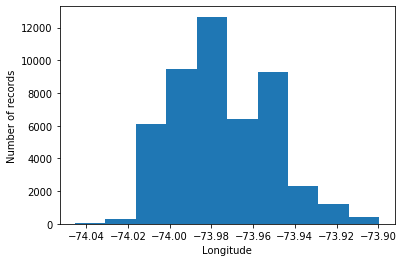

In [10]:
counts, bins = np.histogram(df_long)
_ = plt.hist(bins[:-1], bins, weights = counts)
_ = plt.xlabel('Longitude')
_ = plt.ylabel('Number of records')


# Hour-Wise Listing Trend

In [11]:
df_datetime = df
pd.to_datetime(df_datetime['created']) 
df_datetime['Hour'] = pd.to_datetime(df['created']).dt.hour
df_datetime['Hours_count'] = 1 

df_datetime = df_datetime.groupby('Hour').Hours_count.sum()

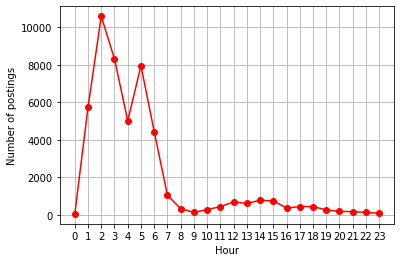

Based on the graph above, the top busiest hours of postings are from 1am to 5am.


In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_datetime,'ro-')

ax.xaxis.set_ticks([0.,1.,2.,3.,4., 5., 6., 7., 8., 9.,10.,11.,12.,13.,14.,15.,16.,17.,18.,19.,20.,21.,22.,23.])
ax.grid(True)
_ = plt.xlabel('Hour')
_ = plt.ylabel('Number of postings')
plt.show()

print("Based on the graph above, the top busiest hours of postings are from 1am to 5am.")

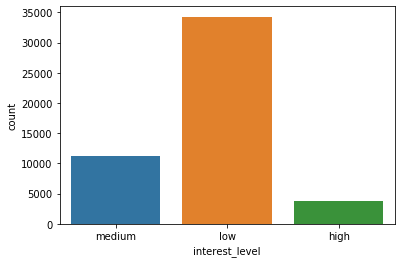

In [13]:
_ = sns.countplot(df['interest_level'])


# Missing Values
 

In [29]:
## Value_counts is used to view the empty value for every attribute. 
## If value_counts does not show empty value at the top of the list, the list is manually searched.

# df['features'].value_counts()
 
 
 

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        3218
[Pre-War, Dogs Allowed, Cats Allowed]                                    

### In summary:

#### 3,218 missing values (empty list) in "features".
#### 8,286 missing values (0) in "building_id".
#### 3,332 missing values (empty object) in "description".
#### 3,615 missing values (empty list) in "photos".

#### No missing values found in "bedrooms", "bathrooms", "created", "display_address", "latitude", "listing_id", "longitude", "manager_id", "interest_level", "price", and "street_address".

# Outlier Analysis

Previously, we found that there are 2963, 1948, and 1102 outliers for "price", "latitude", and "longitude", respectively.



The upper and lower limits are:  3.5 and 0 , respectively.
The total number of records before removing the outliers is 49352 .
Min:  0  Max:  8
The total number of records after removing the outliers is  47126 .
2226 outliers have been removed.


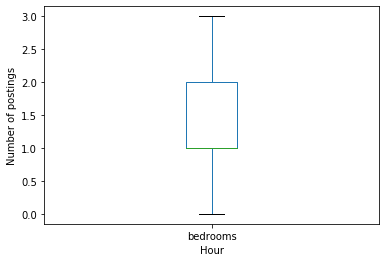

In [15]:
df_bedrooms = df['bedrooms']
 
IQR = df_bedrooms.quantile(0.75)-df_bedrooms.quantile(0.25)
upper = df_bedrooms.quantile(0.75)+IQR*1.5
lower = max(df_bedrooms.quantile(0.25)-IQR*1.5, 0)

print("The upper and lower limits are: ", upper,"and", lower ,", respectively.") 
print("The total number of records before removing the outliers is", before,".")
print("Min: ",min(df_bedrooms) , " Max: ", max(df_bedrooms))

before = df_bedrooms.count()
df_bedrooms = df_bedrooms[(df_bedrooms >= lower) & (df_bedrooms <= upper)]
after = df_bedrooms.count()

print("The total number of records after removing the outliers is ", after,".")
print(str(before-after) +" outliers have been removed.") 
_ = plt.xlabel('Hour')
_ = plt.ylabel('Number of postings')
_ = df_bedrooms.plot.box()

The upper and lower limits are:  1 and 1.0 , respectively.
The total number of records before removing the outliers is 49352 .
The total number of records after removing the outliers is  39422 .
9930 outliers have been removed.


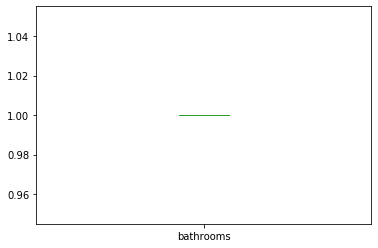

In [16]:
df_bathrooms = df['bathrooms']
 
IQR = df_bathrooms.quantile(0.75)-df_bathrooms.quantile(0.25)

upper = math.ceil(df_bathrooms.quantile(0.75)+IQR*1.5)
lower = max(df_bathrooms.quantile(0.25)-IQR*1.5, 0)
average = sum(df_bathrooms) / len(df_bathrooms)
  
print("The upper and lower limits are: ", upper,"and", lower ,", respectively.") 
print("The total number of records before removing the outliers is", before,".") 

before = df_bathrooms.count()
df_bathrooms = df_bathrooms[(df_bathrooms >= lower) & (df_bathrooms <= upper)]
after = df_bathrooms.count()

print("The total number of records after removing the outliers is ", after,".")
print(str(before-after) +" outliers have been removed.") 

_ = df_bathrooms.plot.box()

# Feature Extraction


## Text Extraction - "features"

In [3]:
df = pd.read_json(r'C:/Users/User/Desktop/CMPT459/as1/train.json')
stop_words = set(stopwords.words('english')) 
stop_words.update({".", "..", "...", ",", "/", "/lndry", ":", "b","’", "•", "this","l", "&", "*", "ss", "in",
                   "**", "***", "!","!!","!!!","!!!!", "w/", "(", ")", "'s", "$", "'", ".."})   

features = df['features'].reset_index(drop = True)
features = features[0:100]
wordSet = set()
wordSetRow = []
for words in features:
    wordsForRows = set()
    
    for word in words:
        word_tokens = word_tokenize(word.lower())
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        wordSet = wordSet.union(filtered_sentence)
        wordsForRows = wordsForRows.union(filtered_sentence)
    
    wordSetRow.append(wordsForRows)
        
# print(len(wordSet))
wordSet

{'access',
 'allowed',
 'balcony',
 'building',
 'cats',
 'center',
 'common',
 'concierge',
 'construction',
 'deck',
 'dining',
 'dishwasher',
 'dogs',
 'doorman',
 'duplex',
 'elevator',
 'exclusive',
 'fee',
 'fireplace',
 'fitness',
 'floors',
 'furnished',
 'garage',
 'garden/patio',
 'hardwood',
 'high',
 'internet',
 'laundry',
 'live-in',
 'loft',
 'lowrise',
 'new',
 'on-site',
 'outdoor',
 'parking',
 'playroom',
 'pool',
 'pre-war',
 'prewar',
 'private',
 'private-balcony',
 'publicoutdoor',
 'reduced',
 'roof',
 'room',
 'simplex',
 'space',
 'speed',
 'super',
 'superintendent',
 'swimming',
 'terrace',
 'unit',
 'wheelchair',
 'wifi'}

In [4]:
new_df = df[0:100] 
wordSetRow
new_df.insert(2, "new_features", wordSetRow)
new_df['new_features'][0:1]
new_df.head()

bathrooms  bedrooms                                       new_features  \
4         1.0         1  {dishwasher, hardwood, room, floors, cats, bui...   
6         1.0         2  {dishwasher, hardwood, elevator, floors, fee, ...   
9         1.0         2  {dishwasher, hardwood, elevator, unit, floors,...   
10        1.5         3                                                 {}   
15        1.0         0  {elevator, center, building, fitness, laundry,...   

                         building_id              created  \
4   8579a0b0d54db803821a35a4a615e97a  2016-06-16 05:55:27   
6   b8e75fc949a6cd8225b455648a951712  2016-06-01 05:44:33   
9   cd759a988b8f23924b5a2058d5ab2b49  2016-06-14 15:19:59   
10  53a5b119ba8f7b61d4e010512e0dfc85  2016-06-24 07:54:24   
15  bfb9405149bfff42a92980b594c28234  2016-06-28 03:50:23   

                                          description      display_address  \
4   Spacious 1 Bedroom 1 Bathroom in Williamsburg!...  145 Borinquen Place   
6   BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...            East 44th   
9   **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...     East 56th Street   
10  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...  Metropolitan Avenue   
15  Over-sized Studio w abundant closets. Availabl...     East 34th Street   

                                             features  latitude  listing_id  \
4   [Dining Room, Pre-War, Laundry in Building, Di...   40.7108     7170325   
6   [Doorman, Elevator, Laundry in Building, Dishw...   40.7513     7092344   
9   [Doorman, Elevator, Laundry in Building, Laund...   40.7575     7158677   
10                                                 []   40.7145     7211212   
15  [Doorman, Elevator, Fitness Center, Laundry in...   40.7439     7225292   

    longitude                        manager_id  \
4    -73.9539  a10db4590843d78c784171a107bdacb4   
6    -73.9722  955db33477af4f40004820b4aed804a0   
9    -73.9625  c8b10a317b766204f08e613cef4ce7a0   
10   -73.9425  5ba989232d0489da1b5f2c45f6688adc   
15   -73.9743  2c3b41f588fbb5234d8a1e885a436cfa   

                                               photos  price  \
4   [https://photos.renthop.com/2/7170325_3bb5ac84...   2400   
6   [https://photos.renthop.com/2/7092344_7663c19a...   3800   
9   [https://photos.renthop.com/2/7158677_c897a134...   3495   
10  [https://photos.renthop.com/2/7211212_1ed4542e...   3000   
15  [https://photos.renthop.com/2/7225292_901f1984...   2795   

             street_address interest_level  
4       145 Borinquen Place         medium  
6             230 East 44th            low  
9      405 East 56th Street         medium  
10  792 Metropolitan Avenue         medium  
15     340 East 34th Street            low

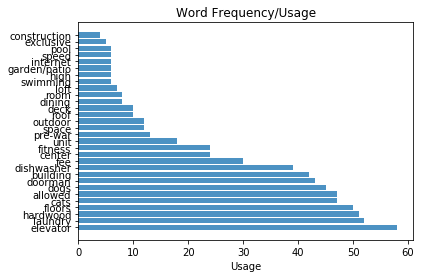

In [5]:
new_features = new_df['new_features'].reset_index(drop = True)
new_features = new_features[0:100]

wordSetFreq = {}
for word in wordSet:
    wordSetFreq[word] = 0;
    
for words in new_features:
    for word in words:
        word_tokens = word_tokenize(word.lower())
        
        for i in range(len(word_tokens)):
            item = word_tokens[i]
            wordSetFreq[item] += 1
         
wordSetFreq = pd.Series(wordSetFreq)

wordSetFreq = pd.DataFrame({'word':wordSetFreq.index, 'frequency':wordSetFreq.values})
wordSetFrq_top75 = wordSetFreq.sort_values(by='frequency',ascending=False)[0:30]

objects = wordSetFrq_top75['word']
y_pos = np.arange(len(objects))
performance = wordSetFrq_top75['frequency']
plt.barh(y_pos, performance, align='center', alpha=0.8)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Word Frequency/Usage')

plt.show()

## Text Extraction - "description"

In [ ]:
description = df['description'].reset_index(drop = True)
description = description[0:10]
wordSet_description = set()
wordSetRow_description = []
wordsForRows = set()
for sentence in description:
    word_tokens = word_tokenize(sentence.lower())
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    wordSet_description = wordSet_description.union(filtered_sentence)
    wordsForRows = wordsForRows.union(filtered_sentence)
    wordSetRow_description.append(wordsForRows)
        
print(len(wordSet_description))
wordSet_description

In [ ]:
print(len(wordSetRow_description))
print(len(new_df))
new_df.head(50)

In [ ]:
new_description = new_df['new_description'].reset_index(drop = True)
new_description = new_description[0:50]

descriptionSetFreq = {}
for word in wordSet_description:
    descriptionSetFreq[word] = 0;   

for words in new_description:
    for w in words:
        descriptionSetFreq[w] += 1
         
descriptionSetFreq = pd.Series(descriptionSetFreq)
descriptionSetFreq = pd.DataFrame({'word':descriptionSetFreq.index, 'frequency':descriptionSetFreq.values})
descriptionSetFreq.info()
wordSetFrq_top75 = wordSetFreq.sort_values(by='frequency',ascending=False)[0:20]
wordSetFrq_top75

In [ ]:
objects = wordSetFrq_top75['word']
y_pos = np.arange(len(objects))
performance = wordSetFrq_top75['frequency']
plt.barh(y_pos, performance, align='center', color = "red", alpha=0.8)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Word Frequency/Usage')

plt.show()

In [ ]:
#Image processing(R G B histogram, Brightness histogram, visial words)

In [18]:

import cv2
extractor = cv2.xfeatures2d.SIFT_create()
def features(image, extractor):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = extractor.detectAndCompute(gray, None)
    return descriptors

#extract the rgb channel histogram for each image
def extractRgbAndBrightnessHist(image):
    b = image[:,:,0]
    g = image[:,:,1]
    r = image[:,:,2]
    Y =  0.257 * b + 0.504 * g + 0.098 * r + 16;
    bHist,bins = np.histogram(b.ravel(),256,[0,256])
    gHist,bins = np.histogram(g.ravel(),256,[0,256])
    rHist,bins = np.histogram(r.ravel(),256,[0,256])
    yHist,bins = np.histogram(Y.ravel(),256,[0,256])
    return rHist , gHist , bHist , yHist

    

In [19]:
def extractImagesFromColumn(photos):
    imgs = []
    directory = ''
    if len(photos) == 0:
        return np.nan
    
    for location in photos:
        name = location.split('https://photos.renthop.com/2/')[1]
        directory = name.split('_')[0]
        fileStr = './images_sample/' + directory + '/' + name
        img = cv2.imread(fileStr) 
        if img is not None:
            imgs.append(fileStr)
        else:
            return np.nan
    return imgs

def extractRGBYFromRow(row):
    R = []
    G = []
    B = []
    Y = []
    
    if row['photos_extracted'] is np.nan:
        row['R'] = np.nan
        row['G'] = np.nan
        row['B'] = np.nan
        row['Y'] = np.nan
        return row
    
    for file in row['photos_extracted']:
        img = cv2.imread(file) 
        if img is not None:
            r,g,b,y = extractRgbAndBrightnessHist(img)
            R.append(r)
            G.append(g)
            B.append(b)
            Y.append(y)
        else:
            row['R'] = np.nan
            row['G'] = np.nan
            row['B'] = np.nan
            row['Y'] = np.nan
            return row
        
    row['R'] = R
    row['G'] = G
    row['B'] = B
    row['Y'] = Y
    
    return row


def extractR(photos):
    R = []
    
    if photos is np.nan:
        return np.nan
    for file in photos:
        img = cv2.imread(file) 
        if img is not None:
            r = img[:,:,2]
            rHist,bins = np.histogram(r.ravel(),256,[0,256])
            R.append(rHist)
        else:
            return np.nan
    return R

def extractG(photos):
    G = []
    
    if photos is np.nan:
        return np.nan
    for file in photos:
        img = cv2.imread(file) 
        if img is not None:
            g = img[:,:,1]
            gHist,bins = np.histogram(g.ravel(),256,[0,256])
            G.append(gHist)
        else:
            return np.nan
    return G
def extractB(photos):
    B = []
    
    if photos is np.nan:
        return np.nan
    for file in photos:
        img = cv2.imread(file) 
        if img is not None:
            b = img[:,:,0]
            bHist,bins = np.histogram(b.ravel(),256,[0,256])
            B.append(bHist)
        else:
            return np.nan
    return B

def extractY(photos):
    Y = []
    if photos is np.nan:
        return np.nan
    for file in photos:
        img = cv2.imread(file) 
        if img is not None:
            b = img[:,:,0]
            g = img[:,:,1]
            r = img[:,:,2]
            y =  0.257 * b + 0.504 * g + 0.098 * r + 16;
            yHist,bins = np.histogram(y.ravel(),256,[0,256])            
            Y.append(yHist)
        else:
            return np.nan
    return Y

def extractVisualWord(photos , extractor):
    visual_words = []
    if photos is np.nan:
        return np.nan
    for file in photos:
        img = cv2.imread(file) 
        if img is not None:
            descriptor = features(img,extractor)          
            visual_words.append(descriptor)
        else:
            return np.nan
    return visual_words

In [20]:
df = df.dropna().reset_index()
photos_extracted = df['photos'].apply(lambda x: extractImagesFromColumn(x))
df['photos_extracted'] = photos_extracted

In [21]:
photos_extracted.dropna()
R = df['photos_extracted'].apply(lambda x: extractR(x))
G = df['photos_extracted'].apply(lambda x: extractG(x))
B = df['photos_extracted'].apply(lambda x: extractB(x))
Y = df['photos_extracted'].apply(lambda x: extractY(x))
visual_words = df['photos_extracted'].apply(lambda x: extractVisualWord(x , extractor))


In [22]:
df['R'] = R
df['G'] = G
df['B'] = B
df['Y'] = Y
df['visual_words'] = visual_words

In [23]:
df_image = df.dropna().reset_index()
df_image

level_0   index  bathrooms  bedrooms                       building_id  \
0      1345  103006        1.0         2                                 0   
1      1413  103149        1.0         1                                 0   
2      1723  103891        1.0         1  18c5b031bad8cef779efa7e2398a42a3   
3      2389  105440        1.0         2                                 0   
4      3968  109072        1.0         0                                 0   
5      4800  110938        1.0         1                                 0   
6      5094  111634        1.0         1                                 0   
7      5186  111817        1.0         1  2a21319016fe50100e0b8ebb5a4f9cf0   
8      5875  113404        1.0         2                                 0   
9      5901  113460        1.0         1                                 0   
10     6424  114617        2.0         3  8775706158cbc96d12dd441d42e11deb   
11     6671  115189        1.0         1                                 0   
12     6729  115303        1.0         1                                 0   
13     7660  117348        1.0         1                                 0   
14     7719  117474        1.0         1  bc4e62116277654d4df66ab77a1152f8   
15     7945  117995        1.0         0  104bfeddd65a0890b071c3a09cf81704   
16     9564  121624        1.0         1                                 0   
17     9847  122220        2.0         3                                 0   
18    10521  123756        1.0         1                                 0   
19    10634  123980        2.0         2                                 0   
20    41959   83181        1.0         1                                 0   
21    44053   88044        1.0         1                                 0   
22    44145   88259        1.0         3                                 0   
23    44268   88512        1.0         0                                 0   
24    44308   88596        1.0         1                                 0   
25    44380   88762        1.0         2                                 0   
26    44687   89421        1.0         1                                 0   
27    45167   90518        1.0         1                                 0   
28    46307   93083        1.0         2                                 0   
29    46519   93559        1.0         1                                 0   
30    46924   94499        1.0         0                                 0   
31    48369   97728        2.0         3  a5c5a4cc6ef64d40bda51b452e3af4ea   

                created                                        description  \
0   2016-04-02 01:20:26  Newer Construction; Meticulously-Kept Building...   
1   2016-04-02 01:18:04  Doorman/Elevator Building With On Site Fitness...   
2   2016-04-02 00:48:13  Phenomenal deal of the century!! This spacious...   
3   2016-04-02 01:17:35  This new construction has a great 2 bedroom wi...   
4   2016-04-02 01:16:45  BRAND NEW ON THE MARKET..........................   
5   2016-04-02 01:13:09  This 1 bedroom apartment is located in Washing...   
6   2016-04-02 01:13:48  AMAZING LOCATION! NO FEE!Murray Hill/Midtown D...   
7   2016-04-01 22:12:41  X-LARGE Flex 1BR Loft! ~~ PRIME Greenwich Vill...   
8   2016-04-02 01:15:58  Convenient location! Close to Time Square- eas...   
9   2016-04-02 01:16:45  Beautiful, completely renovated 1 bedroom apar...   
10  2016-04-01 22:57:15  --- East 31st St & Lexington Avenue --- This S...   
11  2016-04-02 01:20:46  Building features a DOORMAN, ELEVATOR, LAUNDRY...   
12  2016-04-02 01:11:13  Just in time for enjoying Spring/Summer, this ...   
13  2016-04-02 01:11:31  NO FEE Recently renovated, the oversized apart...   
14  2016-04-01 23:26:07  Reduced Fee!! Priced To Rent!\rLarge Newly Upd...   
15  2016-04-01 22:56:00  This Enormous Studio Features: Harwood Floors,...   
16  2016-04-02 01:13:38  **NO FEE**MIDTOWN EAST**D/W**Elevator** Doorma...   
17  2016-04-02 01:14:46  